In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import html
import math
import json

In [2]:
df_athlete = pd.read_csv("athlete_events.csv")
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
df_athlete_json = df_athlete.to_json()

In [4]:
df_athlete_from_json = pd.read_json(df_athlete_json, dtype=False)
df_athlete_from_json

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df_athlete.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
df_athlete_from_json.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Alright, so we have a lot of values to impute, let's first create a copy of our dataframe to work on, instead of
working on the original dataframe

In [7]:
df_athlete_copy = df_athlete.copy()

<AxesSubplot:>

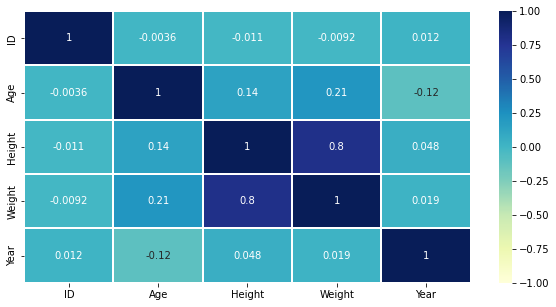

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df_athlete_copy.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

# Age Imputation 

Let's start with imputing the age, given that it is essentially independent from the other variables, let's
use univariate imputation to fill its missing values.

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

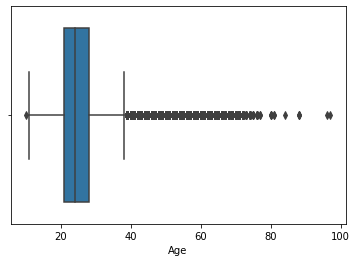

In [9]:
sns.boxplot(df_athlete_copy["Age"])

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

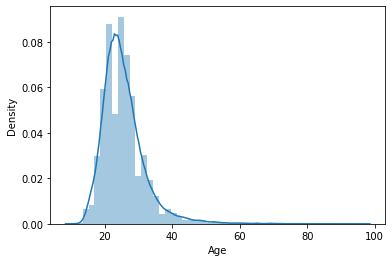

In [10]:
sns.distplot(df_athlete_copy["Age"])

Given that age is normally distributed, let's use the mean of the age column to impute missing values.

In [11]:
sorted(df_athlete_copy.Age.unique())

[14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 45.0,
 46.0,
 47.0,
 49.0,
 53.0,
 54.0,
 57.0,
 nan,
 10.0,
 11.0,
 12.0,
 13.0,
 44.0,
 48.0,
 50.0,
 51.0,
 52.0,
 55.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 80.0,
 81.0,
 84.0,
 88.0,
 96.0,
 97.0]

Time to obtain the mean of the age column.

In [12]:
mean_age= round(df_athlete_copy['Age'].mean())             #get mean age
mean_age

26

In [13]:
df_athlete_copy["Age"].fillna(mean_age, inplace= True)   #Replaced Nan with mean age in age column
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [14]:
df_athlete_copy.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Alright, we can confirm that the age column has been fully imputed

Let's just quickly visualize the distribution of the age column post-imputation

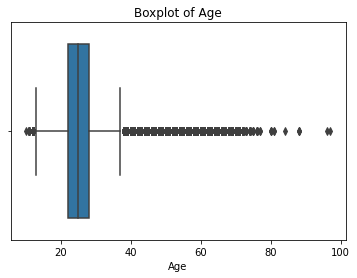

In [15]:
sns.boxplot(x= df_athlete_copy['Age'])            #Boxplot of age after imputation with mean age
plt.title('Boxplot of Age')
plt.show()

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

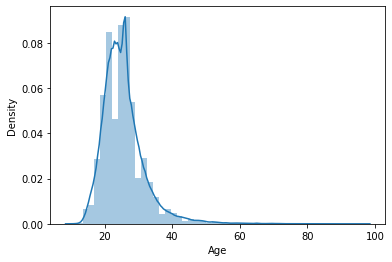

In [16]:
sns.distplot(df_athlete_copy["Age"])

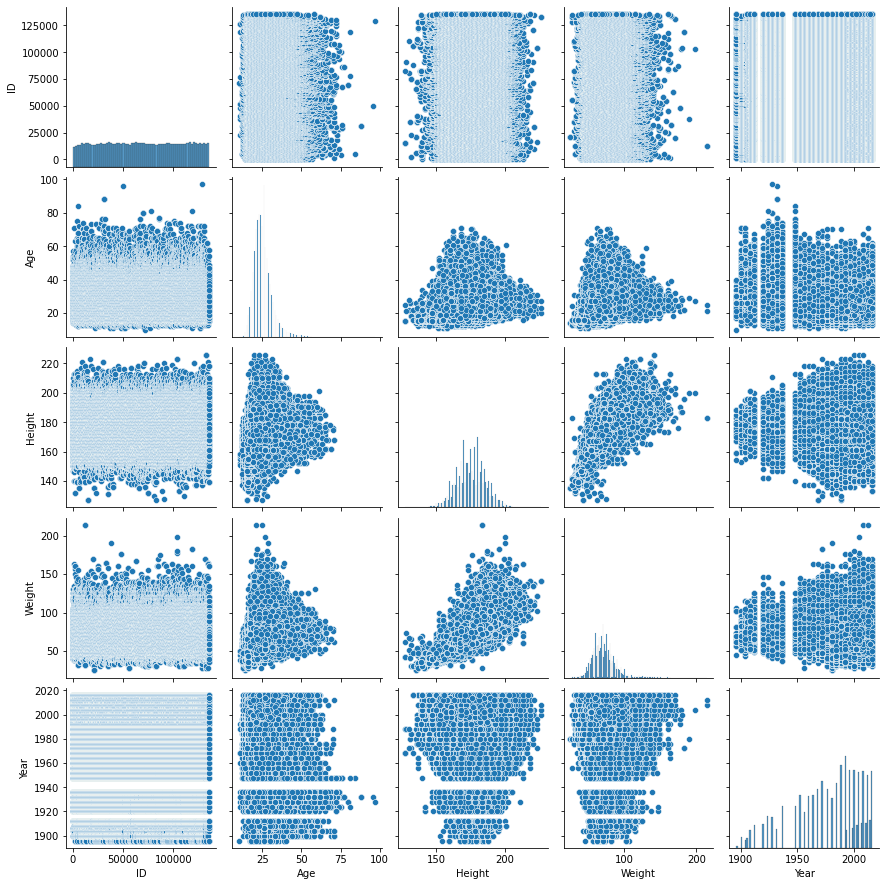

In [17]:
sns.pairplot(df_athlete_copy)

# Height and Weight Imputation

Height and weight are heavily dependent on the sport in which the athlete is competing and the sex of the athlete, since males are typically heavier and taller than females, and certain athletes like basketball players
tend to be taller and heavier than athletes in some other sports. Because of this, we will impute height and weight based on sex and sport.

Let's first visualise the distribution of the height column before imputation so we can decide on whether mean or median should be used.

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

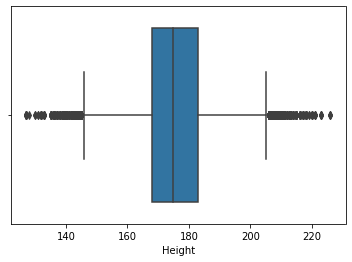

In [18]:
#Height is normally distributed

sns.boxplot(df_athlete_copy["Height"])

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

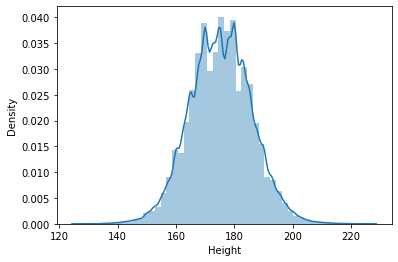

In [19]:
sns.distplot(df_athlete_copy["Height"])

Height is normally distributed, so we will use the mean according to the sex and sport.

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

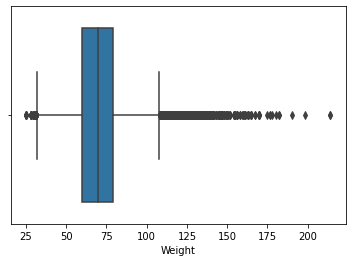

In [20]:
#Weight is normally distributed

sns.boxplot(df_athlete_copy["Weight"])

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

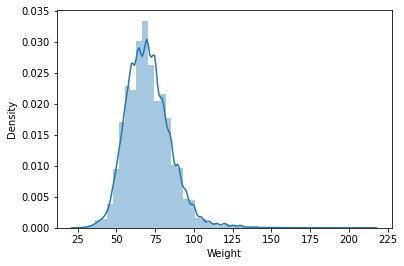

In [21]:
sns.distplot(df_athlete_copy["Weight"])

Weight is also normally distributed, so we will use the mean according to the sex and sport.

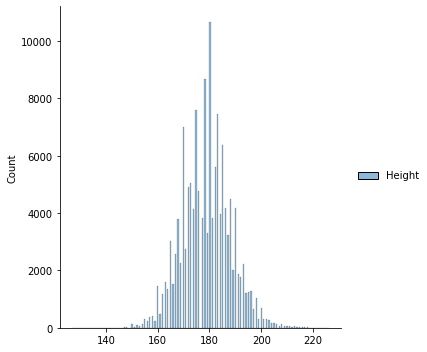

In [22]:
HeightOfMales = df_athlete_copy[df_athlete_copy["Sex"] == "M"][["Sport", "Height"]]
HeightOfMales
sns.displot(HeightOfMales)

Height is normally distributed, so let's obtain the mean of the height column for each sport for males, and use that to impute that to impute the missing values.

In [23]:
#To impute height and weight, we will use multivariate imputation with Sex and Sport as our variables
#Let's first start by obtaining the average height for male athletes in each sport

MeanMaleHeight = round(df_athlete_copy[df_athlete_copy["Sex"] == "M"].groupby(["Sport"])["Height"].mean())
MeanMaleHeight

Sport
Aeronautics           NaN
Alpine Skiing       178.0
Alpinism              NaN
Archery             178.0
Art Competitions    175.0
                    ...  
Tug-Of-War          182.0
Volleyball          193.0
Water Polo          187.0
Weightlifting       169.0
Wrestling           173.0
Name: Height, Length: 63, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

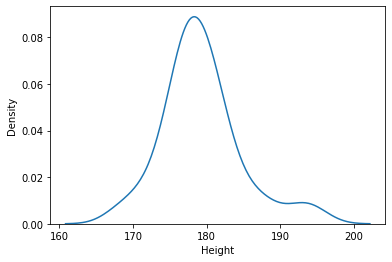

In [24]:
#Let's plot the male heights so we can decide on how to impute the height column (mean or median) --> Normal distribution so mean

sns.kdeplot(MeanMaleHeight)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

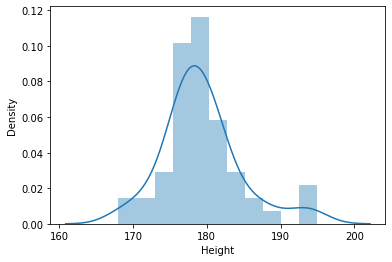

In [25]:
sns.distplot(MeanMaleHeight)

Converting the output stored in "MeanMaleHeight" will to a dictionary of keys and values, will be probably make our life easier in looping on each sport where the sex is male and the height is NaN and imputing the height with the corresponding mean of male heights for that specific sport.

In [26]:
# From the previous results, we can see that some means are NaN, this implies the height values are ALL missing
# for those sports
# This means we won't be able to impute those values using the average of the heights in the same sport
# and the sex, we will use just the sex to help impute these values

# First, let's get a bit more organized and split the results of our groupby's into values that aren't NaN
# and values that are

MaleHeightSportAsDictionary = MeanMaleHeight.apply(float).to_dict()
MaleHeightSportAsDictionary

# Let's first obtain the ones with means equal to NaN, they will be given special treatment
MaleHeightSportAsDictionaryWithNans = {}
for key in MaleHeightSportAsDictionary.keys():
    if (pd.isna(MaleHeightSportAsDictionary.get(key))):
        MaleHeightSportAsDictionaryWithNans.update({key: MaleHeightSportAsDictionary.get(key)})

As it turns out, we have mean heights for certain sports which are NaNs; this would indicate that all the male heights for those sports are NaN. We will treat those differently, instead of using mean height per sex and sport, we will just use the mean height for the sex. Let's split our dictionary into two smaller dictionaries: one with means equal to NaN and one with means equal to only values.

In [27]:
MaleHeightSportAsDictionaryWithNans

{'Aeronautics': nan,
 'Alpinism': nan,
 'Basque Pelota': nan,
 'Cricket': nan,
 'Croquet': nan,
 'Military Ski Patrol': nan,
 'Roque': nan}

In [28]:
#Now let's obtain the ones with mean equal to a value, we can use multivariate imputation according to plan
MaleHeightSportAsDictionaryWithoutNans = {}
for key in MaleHeightSportAsDictionary.keys():
    if ((pd.isna(MaleHeightSportAsDictionary.get(key)))==False):
        MaleHeightSportAsDictionaryWithoutNans.update({key: MaleHeightSportAsDictionary.get(key)})

In [29]:
MaleHeightSportAsDictionaryWithoutNans

{'Alpine Skiing': 178.0,
 'Archery': 178.0,
 'Art Competitions': 175.0,
 'Athletics': 180.0,
 'Badminton': 180.0,
 'Baseball': 183.0,
 'Basketball': 195.0,
 'Beach Volleyball': 193.0,
 'Biathlon': 179.0,
 'Bobsleigh': 182.0,
 'Boxing': 173.0,
 'Canoeing': 181.0,
 'Cross Country Skiing': 178.0,
 'Curling': 181.0,
 'Cycling': 178.0,
 'Diving': 172.0,
 'Equestrianism': 177.0,
 'Fencing': 180.0,
 'Figure Skating': 176.0,
 'Football': 177.0,
 'Freestyle Skiing': 176.0,
 'Golf': 179.0,
 'Gymnastics': 168.0,
 'Handball': 189.0,
 'Hockey': 177.0,
 'Ice Hockey': 181.0,
 'Jeu De Paume': 178.0,
 'Judo': 177.0,
 'Lacrosse': 174.0,
 'Luge': 179.0,
 'Modern Pentathlon': 179.0,
 'Motorboating': 181.0,
 'Nordic Combined': 177.0,
 'Polo': 176.0,
 'Racquets': 176.0,
 'Rowing': 187.0,
 'Rugby': 176.0,
 'Rugby Sevens': 183.0,
 'Sailing': 180.0,
 'Shooting': 176.0,
 'Short Track Speed Skating': 176.0,
 'Skeleton': 181.0,
 'Ski Jumping': 177.0,
 'Snowboarding': 179.0,
 'Speed Skating': 179.0,
 'Swimming': 1

In [30]:
#This is just for us to use as reference, please ignore

#df_athlete_copy[df_athlete_copy["Sport"] == "Football"]["Height"].fillna(value=5)
dfForSport = df_athlete_copy[df_athlete_copy["Sport"] == "Football"]
dfForSport["Height"] = dfForSport["Height"].fillna(value=5)
dfForSport
df_athlete_copy.combine_first(dfForSport)
#df_athlete_copy = df_athlete_copy.combine_first(dfForSport)

<ipython-input-30-5a277b61dfde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfForSport["Height"] = dfForSport["Height"].fillna(value=5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,5.0,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [31]:
#Just for reference, ignore please

df_athlete_copy[df_athlete_copy["Sport"] == "Boxing"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
147,54,Mohamed Jamshid Abadi,M,26.0,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
151,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
162,66,Mohamed Abakkar,M,26.0,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
179,77,Antoine Abang,M,27.0,166.0,75.0,Cameroon,CMR,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270814,135441,Rafael Zuiga Medrano,M,21.0,173.0,57.0,Colombia,COL,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Featherweight,NaN
270893,135472,Karl Zurflh,M,23.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Boxing,Boxing Men's Featherweight,NaN
270894,135473,Franco Zurlo,M,24.0,162.0,54.0,Italy,ITA,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Bantamweight,NaN
270931,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Heavyweight,Silver


Time to loop on the dictionary, free of NaNs and synchronize the keys in the dictionary with the value in the sport column, then impute the NaNs for that sport where the sex is male, with the corresponding value in the dictionary.

In [32]:
for k, v in MaleHeightSportAsDictionaryWithoutNans.items():
    #print(k, v)
    dfForSport = df_athlete_copy[df_athlete_copy["Sex"] == "M"]
    dfForSport = dfForSport[dfForSport["Sport"] == k]
    dfForSport["Height"] = dfForSport["Height"].fillna(value=v)
    df_athlete_copy = df_athlete_copy.combine_first(dfForSport)

df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


For the sports that have NaN height means, where the sex is male, we will use only the mean height for all males to impute those values.

In [33]:
# Since we can't use the average of the heights for male athletes to impute records with height mean = Nan
# We will instead use the average height of all males as a substitute
GlobalMeanMaleHeight = round(df_athlete_copy[df_athlete_copy["Sex"] == "M"]["Height"].mean())
GlobalMeanMaleHeight

179

For each sport, having a height mean of NaN, where the sex is male, use the mean height for all males to impute the missing values.

In [34]:
for k, v in MaleHeightSportAsDictionaryWithNans.items():
    df_MaleHeightGlobal = df_athlete_copy[df_athlete_copy["Sex"]== "M"]
    df_MaleHeightGlobal = df_MaleHeightGlobal[df_MaleHeightGlobal["Sport"] == k]
    df_MaleHeightGlobal["Height"] = df_MaleHeightGlobal["Height"].fillna(GlobalMeanMaleHeight)
    df_athlete_copy = df_athlete_copy.combine_first(df_MaleHeightGlobal)

df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Let's confirm that the height for all males has been imputed.

In [35]:
dfMaleNanCheck = df_athlete_copy[df_athlete_copy["Sex"] == "M"]
dfMaleNanCheck["Height"].isna().sum()

0

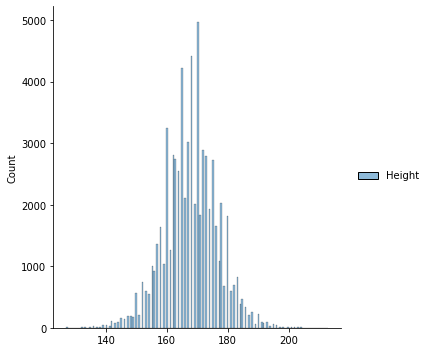

In [36]:
HeightOfFemales = df_athlete_copy[df_athlete_copy["Sex"] == "F"][["Sport", "Height"]]
HeightOfFemales
sns.displot(HeightOfFemales)

Height for females is normally distributed, let's use the mean of the height column for each sport, where the sex is female to impute the missing height values where sex is female.

In [37]:
#Let's do the same for the females

MeanFemaleHeight = round(df_athlete_copy[df_athlete_copy["Sex"] == "F"].groupby(["Sport"])["Height"].mean())
MeanFemaleHeight

Sport
Alpine Skiing                167.0
Alpinism                       NaN
Archery                      167.0
Art Competitions             160.0
Athletics                    169.0
Badminton                    168.0
Basketball                   182.0
Beach Volleyball             179.0
Biathlon                     167.0
Bobsleigh                    173.0
Boxing                       169.0
Canoeing                     170.0
Croquet                        NaN
Cross Country Skiing         167.0
Curling                      168.0
Cycling                      168.0
Diving                       161.0
Equestrianism                168.0
Fencing                      169.0
Figure Skating               161.0
Football                     168.0
Freestyle Skiing             165.0
Golf                         169.0
Gymnastics                   156.0
Handball                     175.0
Hockey                       166.0
Ice Hockey                   168.0
Judo                         166.0
Luge          

<AxesSubplot:xlabel='Height', ylabel='Density'>

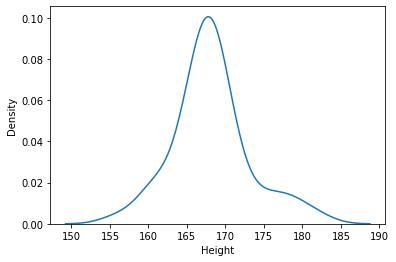

In [38]:
#Let's plot the female height so we can decide on how to impute the height column (mean or median) --> Normal distribution so mean

sns.kdeplot(MeanFemaleHeight)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

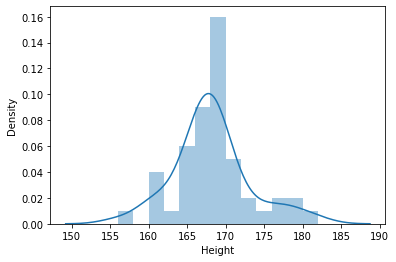

In [39]:
sns.distplot(MeanFemaleHeight)

Same approach as with males.

In [40]:
FemaleHeightSportAsDictionary =  MeanFemaleHeight.apply(float).to_dict()
FemaleHeightSportAsDictionary

{'Alpine Skiing': 167.0,
 'Alpinism': nan,
 'Archery': 167.0,
 'Art Competitions': 160.0,
 'Athletics': 169.0,
 'Badminton': 168.0,
 'Basketball': 182.0,
 'Beach Volleyball': 179.0,
 'Biathlon': 167.0,
 'Bobsleigh': 173.0,
 'Boxing': 169.0,
 'Canoeing': 170.0,
 'Croquet': nan,
 'Cross Country Skiing': 167.0,
 'Curling': 168.0,
 'Cycling': 168.0,
 'Diving': 161.0,
 'Equestrianism': 168.0,
 'Fencing': 169.0,
 'Figure Skating': 161.0,
 'Football': 168.0,
 'Freestyle Skiing': 165.0,
 'Golf': 169.0,
 'Gymnastics': 156.0,
 'Handball': 175.0,
 'Hockey': 166.0,
 'Ice Hockey': 168.0,
 'Judo': 166.0,
 'Luge': 169.0,
 'Modern Pentathlon': 170.0,
 'Motorboating': nan,
 'Rhythmic Gymnastics': 168.0,
 'Rowing': 177.0,
 'Rugby Sevens': 168.0,
 'Sailing': 170.0,
 'Shooting': 165.0,
 'Short Track Speed Skating': 165.0,
 'Skeleton': 168.0,
 'Ski Jumping': 165.0,
 'Snowboarding': 166.0,
 'Softball': 169.0,
 'Speed Skating': 167.0,
 'Swimming': 171.0,
 'Synchronized Swimming': 168.0,
 'Table Tennis': 165.

Same approach for splitting the dictionary.

In [41]:
#Female Athletes will now recieve the same treatment as the males in terms of height imputation

FemaleHeightSportAsDictionaryWithNans = {}
for k, v in FemaleHeightSportAsDictionary.items():
    if (pd.isna(v)):
        FemaleHeightSportAsDictionaryWithNans.update({k:v})
        
FemaleHeightSportAsDictionaryWithNans

{'Alpinism': nan, 'Croquet': nan, 'Motorboating': nan}

In [42]:
FemaleHeightSportAsDictionaryWithoutNans = {}
for k, v in FemaleHeightSportAsDictionary.items():
    if (pd.isna(v) == False):
        FemaleHeightSportAsDictionaryWithoutNans.update({k:v})
        
FemaleHeightSportAsDictionaryWithoutNans

{'Alpine Skiing': 167.0,
 'Archery': 167.0,
 'Art Competitions': 160.0,
 'Athletics': 169.0,
 'Badminton': 168.0,
 'Basketball': 182.0,
 'Beach Volleyball': 179.0,
 'Biathlon': 167.0,
 'Bobsleigh': 173.0,
 'Boxing': 169.0,
 'Canoeing': 170.0,
 'Cross Country Skiing': 167.0,
 'Curling': 168.0,
 'Cycling': 168.0,
 'Diving': 161.0,
 'Equestrianism': 168.0,
 'Fencing': 169.0,
 'Figure Skating': 161.0,
 'Football': 168.0,
 'Freestyle Skiing': 165.0,
 'Golf': 169.0,
 'Gymnastics': 156.0,
 'Handball': 175.0,
 'Hockey': 166.0,
 'Ice Hockey': 168.0,
 'Judo': 166.0,
 'Luge': 169.0,
 'Modern Pentathlon': 170.0,
 'Rhythmic Gymnastics': 168.0,
 'Rowing': 177.0,
 'Rugby Sevens': 168.0,
 'Sailing': 170.0,
 'Shooting': 165.0,
 'Short Track Speed Skating': 165.0,
 'Skeleton': 168.0,
 'Ski Jumping': 165.0,
 'Snowboarding': 166.0,
 'Softball': 169.0,
 'Speed Skating': 167.0,
 'Swimming': 171.0,
 'Synchronized Swimming': 168.0,
 'Table Tennis': 165.0,
 'Taekwondo': 171.0,
 'Tennis': 172.0,
 'Trampolining'

Same approach for mean heights that aren't equal to NaN.

In [43]:
for k, v in FemaleHeightSportAsDictionaryWithoutNans.items():
    dfFemaleHeight = df_athlete_copy[df_athlete_copy["Sex"] == "F"]
    dfFemaleHeight = dfFemaleHeight[dfFemaleHeight["Sport"] == k]
    dfFemaleHeight["Height"] = dfFemaleHeight["Height"].fillna(value=v)
    df_athlete_copy = df_athlete_copy.combine_first(dfFemaleHeight)
    
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Mean female height for all sports will be used to impute height for sport with NaN means, just as with males.

In [44]:
GlobalMeanFemaleHeight = round(df_athlete_copy[df_athlete_copy["Sex"] == "F"]["Height"].mean())
GlobalMeanFemaleHeight

168

In [45]:
for k, v in FemaleHeightSportAsDictionaryWithNans.items():
    dfFemaleHeight = df_athlete_copy[df_athlete_copy["Sex"] == "F"]
    dfFemaleHeight = dfFemaleHeight[dfFemaleHeight["Sport"] == k]
    dfFemaleHeight["Height"] = dfFemaleHeight["Height"].fillna(GlobalMeanFemaleHeight)
    df_athlete_copy = df_athlete_copy.combine_first(dfFemaleHeight)
    
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Confirming that all missing values in the height column has been imputed.

In [46]:
df_athlete_copy["Height"].isna().sum()

0

<AxesSubplot:xlabel='Height', ylabel='Density'>

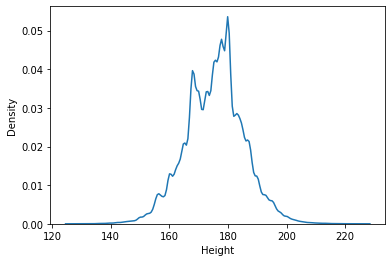

In [47]:
sns.kdeplot(df_athlete_copy["Height"])

#Distribution is still normal

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

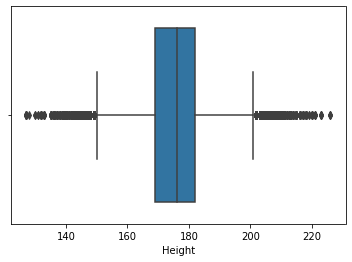

In [48]:
sns.boxplot(df_athlete_copy["Height"])

We will handle the weight in the same manner as the height, for both males and females. The same steps used above for the height are used here, for the weight.

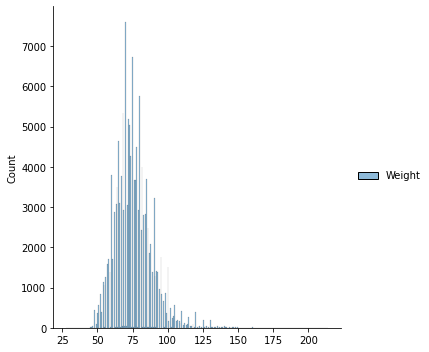

In [49]:
WeightOfMales = df_athlete_copy[df_athlete_copy["Sex"] == "M"][["Sport", "Weight"]]
WeightOfMales
sns.displot(WeightOfMales)

In [50]:
# Now that the Height has been imputed, time to handle the weight
# Let's first plot the weight distribution, see how to act.

WeightSportMale = round(df_athlete_copy[df_athlete_copy["Sex"] == "M"].groupby(["Sport"])["Weight"].mean())
WeightSportMale

Sport
Aeronautics          NaN
Alpine Skiing       79.0
Alpinism             NaN
Archery             77.0
Art Competitions    75.0
                    ... 
Tug-Of-War          96.0
Volleyball          87.0
Water Polo          88.0
Weightlifting       80.0
Wrestling           76.0
Name: Weight, Length: 63, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

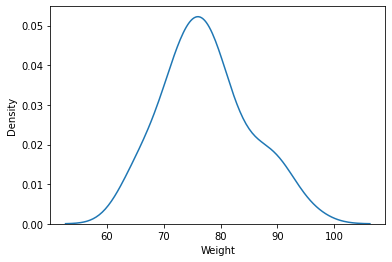

In [51]:
#Let's plot the weight distribution across the different sports so we know how to best act
sns.kdeplot(WeightSportMale)

In [52]:
#Evenly distributed, let's use the mean to impute missing values
WeightSportMaleDictionary = {}
WeightSportMaleDictionary = WeightSportMale.apply(float).to_dict()
WeightSportMaleDictionary

{'Aeronautics': nan,
 'Alpine Skiing': 79.0,
 'Alpinism': nan,
 'Archery': 77.0,
 'Art Competitions': 75.0,
 'Athletics': 74.0,
 'Badminton': 74.0,
 'Baseball': 86.0,
 'Basketball': 92.0,
 'Basque Pelota': nan,
 'Beach Volleyball': 90.0,
 'Biathlon': 73.0,
 'Bobsleigh': 90.0,
 'Boxing': 65.0,
 'Canoeing': 80.0,
 'Cricket': nan,
 'Croquet': nan,
 'Cross Country Skiing': 72.0,
 'Curling': 81.0,
 'Cycling': 72.0,
 'Diving': 67.0,
 'Equestrianism': 71.0,
 'Fencing': 75.0,
 'Figure Skating': 70.0,
 'Football': 73.0,
 'Freestyle Skiing': 75.0,
 'Golf': 79.0,
 'Gymnastics': 63.0,
 'Handball': 89.0,
 'Hockey': 73.0,
 'Ice Hockey': 84.0,
 'Jeu De Paume': nan,
 'Judo': 84.0,
 'Lacrosse': 77.0,
 'Luge': 81.0,
 'Military Ski Patrol': nan,
 'Modern Pentathlon': 72.0,
 'Motorboating': 77.0,
 'Nordic Combined': 67.0,
 'Polo': nan,
 'Racquets': nan,
 'Roque': nan,
 'Rowing': 84.0,
 'Rugby': 78.0,
 'Rugby Sevens': 91.0,
 'Sailing': 79.0,
 'Shooting': 78.0,
 'Short Track Speed Skating': 71.0,
 'Skeleton

In [53]:
WeightSportMaleDictionaryWithNans = {}
for k, v in WeightSportMaleDictionary.items():
    if (pd.isna(v)):
        WeightSportMaleDictionaryWithNans.update({k:v})

WeightSportMaleDictionaryWithNans

{'Aeronautics': nan,
 'Alpinism': nan,
 'Basque Pelota': nan,
 'Cricket': nan,
 'Croquet': nan,
 'Jeu De Paume': nan,
 'Military Ski Patrol': nan,
 'Polo': nan,
 'Racquets': nan,
 'Roque': nan}

In [54]:
WeightSportMaleDictionaryWithoutNans = {}
for k, v in WeightSportMaleDictionary.items():
    if (pd.isna(v) == False):
        WeightSportMaleDictionaryWithoutNans.update({k:v})

WeightSportMaleDictionaryWithoutNans

{'Alpine Skiing': 79.0,
 'Archery': 77.0,
 'Art Competitions': 75.0,
 'Athletics': 74.0,
 'Badminton': 74.0,
 'Baseball': 86.0,
 'Basketball': 92.0,
 'Beach Volleyball': 90.0,
 'Biathlon': 73.0,
 'Bobsleigh': 90.0,
 'Boxing': 65.0,
 'Canoeing': 80.0,
 'Cross Country Skiing': 72.0,
 'Curling': 81.0,
 'Cycling': 72.0,
 'Diving': 67.0,
 'Equestrianism': 71.0,
 'Fencing': 75.0,
 'Figure Skating': 70.0,
 'Football': 73.0,
 'Freestyle Skiing': 75.0,
 'Golf': 79.0,
 'Gymnastics': 63.0,
 'Handball': 89.0,
 'Hockey': 73.0,
 'Ice Hockey': 84.0,
 'Judo': 84.0,
 'Lacrosse': 77.0,
 'Luge': 81.0,
 'Modern Pentathlon': 72.0,
 'Motorboating': 77.0,
 'Nordic Combined': 67.0,
 'Rowing': 84.0,
 'Rugby': 78.0,
 'Rugby Sevens': 91.0,
 'Sailing': 79.0,
 'Shooting': 78.0,
 'Short Track Speed Skating': 71.0,
 'Skeleton': 82.0,
 'Ski Jumping': 65.0,
 'Snowboarding': 77.0,
 'Speed Skating': 76.0,
 'Swimming': 78.0,
 'Table Tennis': 71.0,
 'Taekwondo': 75.0,
 'Tennis': 79.0,
 'Trampolining': 66.0,
 'Triathlon': 

In [55]:
for k, v in WeightSportMaleDictionaryWithoutNans.items():
    #print(k, v)
    dfForSport = df_athlete_copy[df_athlete_copy["Sex"] == "M"]
    dfForSport = dfForSport[dfForSport["Sport"] == k]
    dfForSport["Weight"] = dfForSport["Weight"].fillna(value=v)
    df_athlete_copy = df_athlete_copy.combine_first(dfForSport)

df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [56]:
GlobalMaleWeight = round(df_athlete_copy[df_athlete_copy["Sex"] == 'M']["Weight"].mean())
GlobalMaleWeight

75

In [57]:
for k, v in WeightSportMaleDictionaryWithNans.items():
    #print(k, v)
    dfForSport = df_athlete_copy[df_athlete_copy["Sex"] == "M"]
    dfForSport = dfForSport[dfForSport["Sport"] == k]
    dfForSport["Weight"] = dfForSport["Weight"].fillna(value=GlobalMaleWeight)
    df_athlete_copy = df_athlete_copy.combine_first(dfForSport)

df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [58]:
df_athlete_copy[df_athlete_copy["Sex"] == "M"]["Weight"].isna().sum()

0

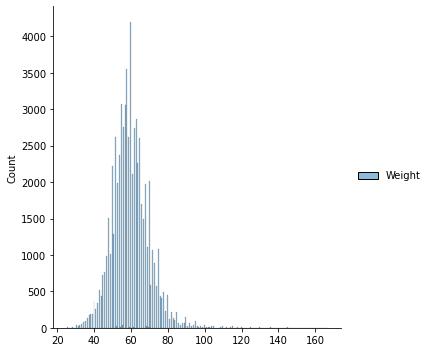

In [59]:
WeightOfFemales = df_athlete_copy[df_athlete_copy["Sex"] == "F"][["Sport", "Weight"]]
WeightOfFemales
sns.displot(WeightOfFemales)

In [60]:
WeightSportFemale = round(df_athlete_copy[df_athlete_copy["Sex"] == "F"].groupby(["Sport"])["Weight"].mean())
WeightSportFemale

Sport
Alpine Skiing                63.0
Alpinism                      NaN
Archery                      62.0
Art Competitions              NaN
Athletics                    60.0
Badminton                    62.0
Basketball                   74.0
Beach Volleyball             68.0
Biathlon                     57.0
Bobsleigh                    73.0
Boxing                       62.0
Canoeing                     65.0
Croquet                       NaN
Cross Country Skiing         57.0
Curling                      63.0
Cycling                      60.0
Diving                       54.0
Equestrianism                59.0
Fencing                      61.0
Figure Skating               50.0
Football                     61.0
Freestyle Skiing             58.0
Golf                         63.0
Gymnastics                   48.0
Handball                     69.0
Hockey                       61.0
Ice Hockey                   66.0
Judo                         67.0
Luge                         67.0
Modern P

In [61]:
WeightSportFemaleDictionary = {}
WeightSportFemaleDictionary = WeightSportFemale.apply(float).to_dict()
WeightSportFemaleDictionary

{'Alpine Skiing': 63.0,
 'Alpinism': nan,
 'Archery': 62.0,
 'Art Competitions': nan,
 'Athletics': 60.0,
 'Badminton': 62.0,
 'Basketball': 74.0,
 'Beach Volleyball': 68.0,
 'Biathlon': 57.0,
 'Bobsleigh': 73.0,
 'Boxing': 62.0,
 'Canoeing': 65.0,
 'Croquet': nan,
 'Cross Country Skiing': 57.0,
 'Curling': 63.0,
 'Cycling': 60.0,
 'Diving': 54.0,
 'Equestrianism': 59.0,
 'Fencing': 61.0,
 'Figure Skating': 50.0,
 'Football': 61.0,
 'Freestyle Skiing': 58.0,
 'Golf': 63.0,
 'Gymnastics': 48.0,
 'Handball': 69.0,
 'Hockey': 61.0,
 'Ice Hockey': 66.0,
 'Judo': 67.0,
 'Luge': 67.0,
 'Modern Pentathlon': 58.0,
 'Motorboating': nan,
 'Rhythmic Gymnastics': 49.0,
 'Rowing': 70.0,
 'Rugby Sevens': 67.0,
 'Sailing': 63.0,
 'Shooting': 61.0,
 'Short Track Speed Skating': 57.0,
 'Skeleton': 61.0,
 'Ski Jumping': 53.0,
 'Snowboarding': 60.0,
 'Softball': 67.0,
 'Speed Skating': 62.0,
 'Swimming': 61.0,
 'Synchronized Swimming': 56.0,
 'Table Tennis': 58.0,
 'Taekwondo': 61.0,
 'Tennis': 62.0,
 'T

In [62]:
WeightSportFemaleDictionaryWithoutNans = {}
WeightSportFemaleDictionaryWithNans = {}

for k, v  in WeightSportFemaleDictionary.items():
    if (pd.isna(v) == False):
        WeightSportFemaleDictionaryWithoutNans.update({k:v})
    else:
        WeightSportFemaleDictionaryWithNans.update({k:v})

In [63]:
WeightSportFemaleDictionaryWithoutNans

{'Alpine Skiing': 63.0,
 'Archery': 62.0,
 'Athletics': 60.0,
 'Badminton': 62.0,
 'Basketball': 74.0,
 'Beach Volleyball': 68.0,
 'Biathlon': 57.0,
 'Bobsleigh': 73.0,
 'Boxing': 62.0,
 'Canoeing': 65.0,
 'Cross Country Skiing': 57.0,
 'Curling': 63.0,
 'Cycling': 60.0,
 'Diving': 54.0,
 'Equestrianism': 59.0,
 'Fencing': 61.0,
 'Figure Skating': 50.0,
 'Football': 61.0,
 'Freestyle Skiing': 58.0,
 'Golf': 63.0,
 'Gymnastics': 48.0,
 'Handball': 69.0,
 'Hockey': 61.0,
 'Ice Hockey': 66.0,
 'Judo': 67.0,
 'Luge': 67.0,
 'Modern Pentathlon': 58.0,
 'Rhythmic Gymnastics': 49.0,
 'Rowing': 70.0,
 'Rugby Sevens': 67.0,
 'Sailing': 63.0,
 'Shooting': 61.0,
 'Short Track Speed Skating': 57.0,
 'Skeleton': 61.0,
 'Ski Jumping': 53.0,
 'Snowboarding': 60.0,
 'Softball': 67.0,
 'Speed Skating': 62.0,
 'Swimming': 61.0,
 'Synchronized Swimming': 56.0,
 'Table Tennis': 58.0,
 'Taekwondo': 61.0,
 'Tennis': 62.0,
 'Trampolining': 53.0,
 'Triathlon': 55.0,
 'Volleyball': 69.0,
 'Water Polo': 70.0,
 

In [64]:
WeightSportFemaleDictionaryWithNans

{'Alpinism': nan, 'Art Competitions': nan, 'Croquet': nan, 'Motorboating': nan}

In [65]:
for k, v in WeightSportFemaleDictionaryWithoutNans.items():
    #print(k, v)
    dfForSport = df_athlete_copy[df_athlete_copy["Sex"] == "F"]
    dfForSport = dfForSport[dfForSport["Sport"] == k]
    dfForSport["Weight"] = dfForSport["Weight"].fillna(value=v)
    df_athlete_copy = df_athlete_copy.combine_first(dfForSport)

df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [66]:
GlobalFemaleWeight = round(df_athlete_copy[df_athlete_copy["Sex"] == "F"]["Weight"].mean())
GlobalFemaleWeight

60

In [67]:
for k,v in WeightSportFemaleDictionaryWithNans.items():
    dfForSport = df_athlete_copy[df_athlete_copy["Sex"] == "F"]
    dfForSport = dfForSport[dfForSport["Sport"] == k]
    dfForSport["Weight"] = dfForSport["Weight"].fillna(value=GlobalFemaleWeight)
    df_athlete_copy = df_athlete_copy.combine_first(dfForSport)
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [68]:
# Checking nan values after imputation
df_athlete_copy['Weight'].isna().sum()

0

<AxesSubplot:xlabel='Weight', ylabel='Density'>

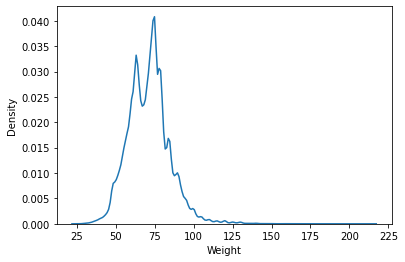

In [69]:
sns.kdeplot(df_athlete_copy['Weight'])
#Distribution is maintained

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

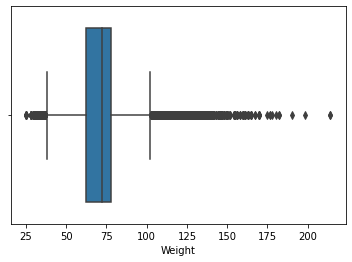

In [70]:
sns.boxplot(df_athlete_copy["Weight"])

<AxesSubplot:>

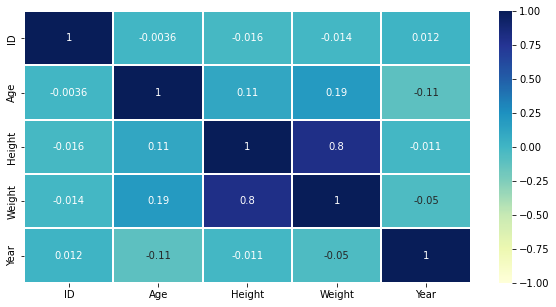

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(df_athlete_copy.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

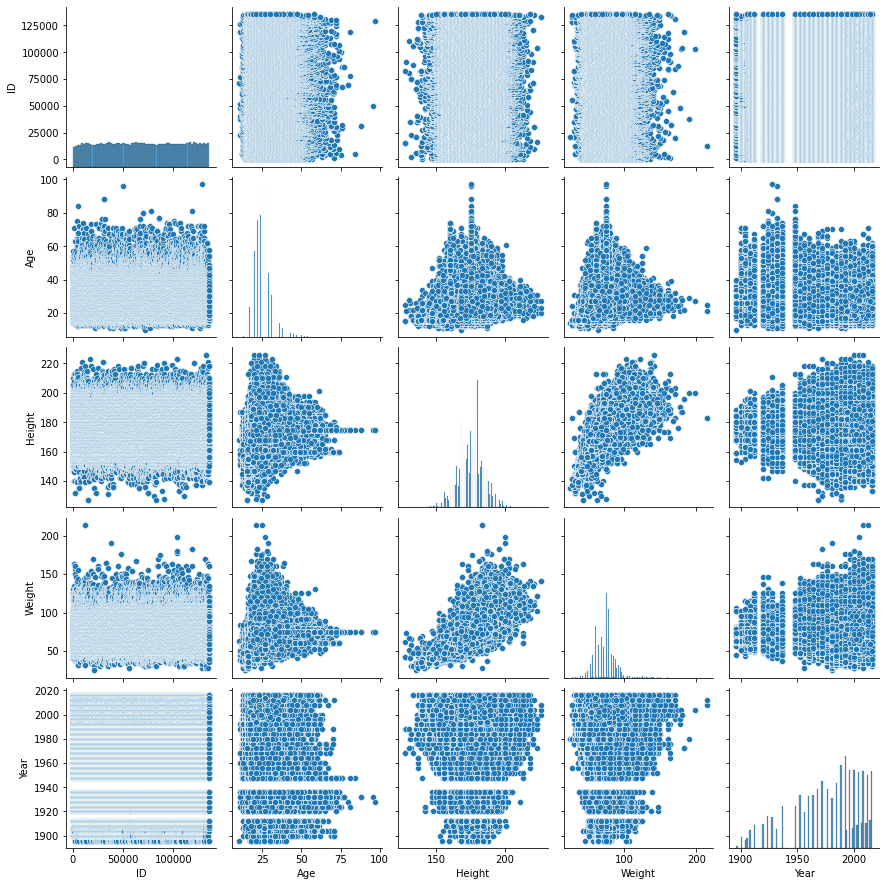

In [72]:
sns.pairplot(df_athlete_copy)

# Imputing the Medal Column

The Medal column contains a great deal of NaN values. However, a value being equal to NaN implies that is missing. After reading the documentation for the dataset, we can assume that NaN in the Medal column means no medal was earned by the athlete. Based on this assumption, we will impute the NaN values with "None".

In [73]:
#Assumption made: NaN in the medal value represents that the player did not win a medal, will just impute
#with none

df_athlete_copy["Medal"].fillna("None", inplace= True)
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


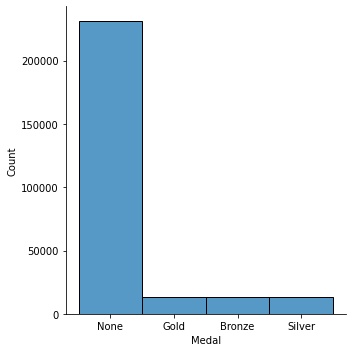

In [74]:
sns.displot(df_athlete_copy["Medal"])

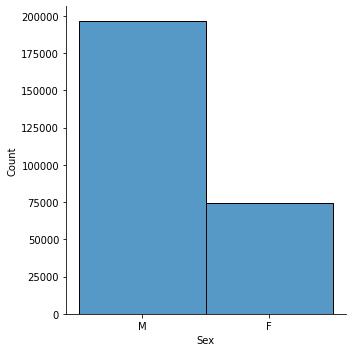

In [75]:
sns.displot(df_athlete_copy["Sex"])

In [76]:
#Checking if seasons are consistent
len(df_athlete_copy["NOC"].unique())
df_athlete_copy["Season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [77]:
#Checking if medal values are consistent
df_athlete_copy["Medal"].nunique()

4

# Imputing the Team Column

We noticed that teams in some records do not correspond to their respective NOC; for example in record 3, the team is Denmark/Sweden, while the country code (NOC) is DEN (for Denmark). This does not make sense, because if a player is from a country then their team represents that country. We will handle such inconsistencies in the team column in the "athlete_events" dataset using the values in the region column in the "noc_regions" dataset.

In [78]:
#Noticed that teams in some records do not correspond to their respective NOC which we believe does not make
#sense, because if a player is from a country then their team represents that country. An example
#of an NOC not matching with the team lies in record 3, in which team is Denmark/Sweden but NOC is DEN

#To handle this we will use the regions in NOC to fill the teams

df_noc_regions = pd.read_csv("noc_regions.csv")
df_noc_regions.head(60)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [79]:
df_noc_regions_copy = df_noc_regions.copy()
df_noc_regions_copy

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


<Figure size 5000x5000 with 0 Axes>

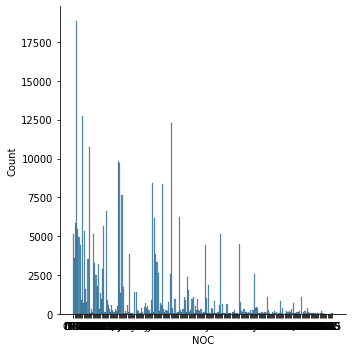

In [80]:
plt.figure(figsize=(50,50), dpi=100)
sns.displot(df_athlete_copy["NOC"])

<Figure size 5000x5000 with 0 Axes>

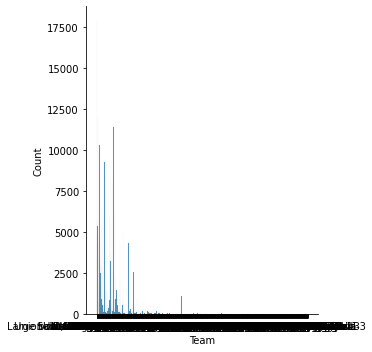

In [81]:
plt.figure(figsize=(50,50), dpi=100)
sns.displot(df_athlete_copy["Team"])

Let's create a dictionary, storing NOC and region pairs, we will later use this dictionary to impute the values in the 'Team' column using the corresponding values (containing the region) in the dictionary.

In [82]:
#Will store each NOC and its corresponding region in a dictionary, which will be referenced when filling
# the team values

df_noc_regions_copy["NOC"].isna().sum()
df_noc_regions_copy.dtypes

DictionaryNOCRegions = {}
for index, row in df_noc_regions_copy.iterrows():
    DictionaryNOCRegions.update({df_noc_regions_copy.iloc[index,0]:df_noc_regions_copy.iloc[index,1]})


In [83]:
DictionaryNOCRegions

{'AFG': 'Afghanistan',
 'AHO': 'Curacao',
 'ALB': 'Albania',
 'ALG': 'Algeria',
 'AND': 'Andorra',
 'ANG': 'Angola',
 'ANT': 'Antigua',
 'ANZ': 'Australia',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ARU': 'Aruba',
 'ASA': 'American Samoa',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BAH': 'Bahamas',
 'BAN': 'Bangladesh',
 'BAR': 'Barbados',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BER': 'Bermuda',
 'BHU': 'Bhutan',
 'BIH': 'Bosnia and Herzegovina',
 'BIZ': 'Belize',
 'BLR': 'Belarus',
 'BOH': 'Czech Republic',
 'BOL': 'Boliva',
 'BOT': 'Botswana',
 'BRA': 'Brazil',
 'BRN': 'Bahrain',
 'BRU': 'Brunei',
 'BUL': 'Bulgaria',
 'BUR': 'Burkina Faso',
 'CAF': 'Central African Republic',
 'CAM': 'Cambodia',
 'CAN': 'Canada',
 'CAY': 'Cayman Islands',
 'CGO': 'Republic of Congo',
 'CHA': 'Chad',
 'CHI': 'Chile',
 'CHN': 'China',
 'CIV': 'Ivory Coast',
 'CMR': 'Cameroon',
 'COD': 'Democratic Republic of the Congo',
 'COK': 'Cook Islands',
 'COL': 'Colombia',
 

In [84]:
#Just reference code, please ignore

# dfRegion = df_athlete_copy[df_athlete_copy["NOC"] == "DEN"]
# dfRegion["Team"] = "Denmark"
# df_athlete_copy = df_athlete_copy.combine_first(dfRegion)
# dfRegion

Here, we loop on the "athlete_events" dataframe, using the NOC values in each record to refer to the dictionary and use the value of the region to impute the team value. This should eliminate any inconsistencies.

In [85]:
#Here, we use the NOC of each record to reference the dictionary and use the region to replace the old team value

for index, row in df_athlete_copy.iterrows():
    value = str(DictionaryNOCRegions.get(row["NOC"]))
    df_athlete_copy.iloc[index, 6] = value
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


We realised that the 'noc_regions' dataset has regions that are equal to 'nan' (not NaN) for certain NOCs such as 'ROT'. The code 'SGP' was also missing entirely from 'noc_regions' while being present in 'athlete_events'.

In [86]:
print(df_athlete_copy['Team'].unique())
print(df_athlete_copy['NOC'].unique())


#Noticed that SGP has nan for Team, research has granted us knowledge that SGP stands for Singapore


['China' 'Denmark' 'Netherlands' 'USA' 'Finland' 'Norway' 'Romania'
 'Estonia' 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy'
 'Chad' 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus'
 'Greece' 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' 'None' 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Virgin Islands, US' 'Sri Lanka' 'Armenia'
 'Ivory Coast' 'Kenya' 'Benin' 'Ukraine' 'UK' 'Ghana' 'Somalia' 'Latvia'
 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica' 'Panama' 'Georgia'
 'Slovenia' 'Croatia' 'Guyana'

'SGP' has 'none' in its team values, we did some googling and found that 'SGP' stands for Singapore. With this knowledge, we can now impute the teams where NOC equals "SGP".

In [87]:
df_athlete_copy[df_athlete_copy['NOC']=="SGP"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332.0,Zarinah Abdullah,F,21.0,168.0,62.0,None,SGP,1992 Summer,1992.0,Summer,Barcelona,Badminton,Badminton Women's Singles,None
579,332.0,Zarinah Abdullah,F,25.0,168.0,62.0,None,SGP,1996 Summer,1996.0,Summer,Atlanta,Badminton,Badminton Women's Singles,None
2719,1515.0,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,None,SGP,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,None
7659,4264.0,Ang Peng Siong,M,21.0,180.0,75.0,None,SGP,1984 Summer,1984.0,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,None
7660,4264.0,Ang Peng Siong,M,21.0,180.0,75.0,None,SGP,1984 Summer,1984.0,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454.0,Zhang Guirong,F,26.0,182.0,95.0,None,SGP,2004 Summer,2004.0,Summer,Athina,Athletics,Athletics Women's Shot Put,None
268753,134454.0,Zhang Guirong,F,30.0,182.0,95.0,None,SGP,2008 Summer,2008.0,Summer,Beijing,Athletics,Athletics Women's Shot Put,None
268993,134587.0,Zhang Xueling,F,21.0,163.0,53.0,None,SGP,2004 Summer,2004.0,Summer,Athina,Table Tennis,Table Tennis Women's Singles,None
268994,134587.0,Zhang Xueling,F,21.0,163.0,53.0,None,SGP,2004 Summer,2004.0,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,None


In [88]:


for index, row in df_athlete_copy.iterrows():
    value = row["NOC"]
    if (value == "SGP"):
        df_athlete_copy.iloc[index, 6] = "Singapore"
    
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [89]:
print(df_athlete_copy['Team'].nunique())
print(df_athlete_copy['NOC'].nunique())

207
230


This is a result of the replacement process done above, NaN values were now replaced with "nan". We replaced "nan" with NaN.

In [90]:
df_athlete_copy['Team'].replace('nan', np.nan, inplace=True)
df_athlete_copy[df_athlete_copy['Team'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515.0,Paulo Amotun Lokoro,M,24.0,170.0,61.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",None
7908,4379.0,Rami Anis,M,25.0,178.0,78.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,None
7909,4379.0,Rami Anis,M,25.0,178.0,78.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,None
21529,11364.0,Yiech Pur Biel,M,21.0,178.0,62.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,None
31708,16287.0,Mabika Yolande Bukasa,F,28.0,170.0,70.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,None
40238,20693.0,James Nyang Chiengjiek,M,24.0,179.0,59.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,None
61080,31292.0,Fritz Eccard,M,26.0,175.0,75.0,NaN,UNK,1912 Summer,1912.0,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,None
64674,33094.0,Logona Esau,M,21.0,163.0,69.0,NaN,TUV,2008 Summer,2008.0,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,None
119392,60444.0,Yonas Kinde,M,36.0,172.0,57.0,NaN,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,None
130721,65813.0,A. Laffen,M,26.0,175.0,75.0,NaN,UNK,1912 Summer,1912.0,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,None


After doing the previous step, we can now tell which NOCs have missing values.

In [91]:
NanTeams = df_athlete_copy[df_athlete_copy["Team"].isna()]
NanTeams["NOC"].unique()

array(['ROT', 'UNK', 'TUV'], dtype=object)

The NOCs in NanTeams are the ones that have missing team values, we can google each of those country codes and find the corresponding country for imputing the team values.

In [92]:
for index, row in df_athlete_copy.iterrows():
    value = row["NOC"]
    if (value == "ROT"):
        df_athlete_copy.iloc[index, 6] = "Team of Refugee Olympic Athletes"
    
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [93]:
for index, row in df_athlete_copy.iterrows():
    value = row["NOC"]
    if (value == "TUV"):
        df_athlete_copy.iloc[index, 6] = "Tuvalu"
    elif (value == "UNK"):
        df_athlete_copy.iloc[index, 6] = "Unknown"
    
df_athlete_copy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3.0,Gunnar Nielsen Aaby,M,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None
3,4.0,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569.0,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976.0,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


Now, we imputed all the missing team values. Let's confirm there's no more missing values left.

In [94]:
NanTeams = df_athlete_copy[df_athlete_copy["Team"].isna()]
NanTeams["NOC"].unique()

array([], dtype=object)

In [95]:
print(df_athlete_copy['Team'].nunique())
print(df_athlete_copy['NOC'].nunique())

209
230


<Figure size 5000x5000 with 0 Axes>

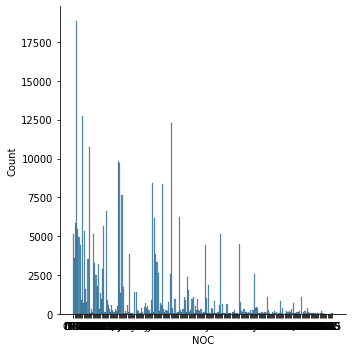

In [96]:
plt.figure(figsize=(50,50), dpi=100)
sns.displot(df_athlete_copy["NOC"])

<Figure size 5000x5000 with 0 Axes>

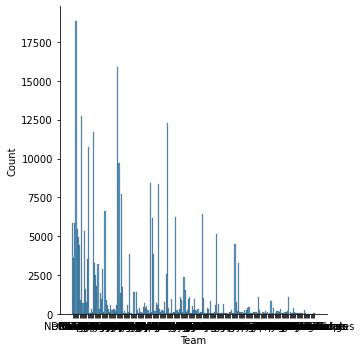

In [97]:
plt.figure(figsize=(50,50), dpi=100)
sns.displot(df_athlete_copy["Team"])

# Encoding for Sex

Models love working with numerical values instead of categorical ones, given that sex is categorical and only has 2 values, encoding the sex column will not increase the number of columns too much, while also proving beneficial in training.

In [98]:
#Models tend to work better with numerical values, let's do some encoding on the sex column given
#there's only 2 values, and it's categorical

df_athlete_copy = pd.get_dummies(df_athlete_copy, columns= ["Sex"])
df_athlete_copy.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M
0,1.0,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,0,1
1,2.0,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,None,0,1
2,3.0,Gunnar Nielsen Aaby,24.0,177.0,73.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,None,0,1
3,4.0,Edgar Lindenau Aabye,34.0,182.0,96.0,Denmark,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1
4,5.0,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,1,0


# Data Integration, Feature Engineering and Research Question Answers

Let's start off by sorting the dataset in terms of year.

In [99]:
df_athlete_copy = df_athlete_copy.sort_values(by=['Year'])
df_athlete_copy

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M
214333,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,None,0,1
244717,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,0,1
244716,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Long Jump,None,0,1
23912,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,None,0,1
23913,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419.0,Luis Fernando Lpez Erazo,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,None,0,1
47729,24610.0,Enrico D'Aniello,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,None,0,1
47728,24609.0,Sabrina D'Angelo,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze,1,0
47746,24621.0,Andrea Mitchell D'Arrigo,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,None,0,1


We should probably drop any duplicate rows before integration.

In [100]:
df_athlete_copy.drop_duplicates(inplace=True)
df_athlete_copy

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M
214333,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,None,0,1
244717,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,0,1
244716,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Long Jump,None,0,1
23912,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,None,0,1
23913,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419.0,Luis Fernando Lpez Erazo,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,None,0,1
47729,24610.0,Enrico D'Aniello,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,None,0,1
47728,24609.0,Sabrina D'Angelo,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze,1,0
47746,24621.0,Andrea Mitchell D'Arrigo,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,None,0,1


## Data Integration 1

Since we're only going to be adding the region column from noc_regions, let's filter out the column that we don't need. We need to keep "NOC" to merge on it, and of course the "region" column.

In [101]:
regions_df = df_noc_regions[["NOC","region"]]
regions_df

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,Yemen
227,YUG,Serbia
228,ZAM,Zambia


Since the NOC columns from the newly cleaned "athlete_events" (We'll refer to it as just "athlete_events" from now on), and noc_regions may have different values, let's use NOC to do a left join. This will preserve all columns in the left dataset, we'll handle conflicts in key values later on.

In [102]:
## MARKED FOR RETURN




df_merged = pd.merge(df_athlete_copy, regions_df, on="NOC", how="left")
df_merged.rename(columns={"region":"Region"}, inplace=True)

# Alright, since there's probably some conflict in the key values, we should expect some missing
# Region values, let's see which NOC values they're associated to.

listnan = []
for index, row in df_merged.iterrows():
    if (pd.isnull(row["Region"]) == True):
        listnan.append(row["NOC"])
listnan = np.array(listnan)
seriesnan = pd.Series(listnan)
seriesnan.unique()

array(['UNK', 'SGP', 'TUV', 'ROT'], dtype=object)

In [103]:
df_merged.isna().sum()

ID          0
Name        0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
Sex_F       0
Sex_M       0
Region    370
dtype: int64

In [104]:
df_merged

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M,Region
0,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,None,0,1,Germany
1,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,0,1,France
2,122526.0,Pierre Alexandre Tuffri,19.0,180.0,74.0,France,FRA,1896 Summer,1896.0,Summer,Athina,Athletics,Athletics Men's Long Jump,None,0,1,France
3,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,None,0,1,Germany
4,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,None,0,1,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269713,71419.0,Luis Fernando Lpez Erazo,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,None,0,1,Colombia
269714,24610.0,Enrico D'Aniello,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,None,0,1,Italy
269715,24609.0,Sabrina D'Angelo,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze,1,0,Canada
269716,24621.0,Andrea Mitchell D'Arrigo,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,None,0,1,Italy


From what we can see, it would appear that there are 4 NOC values resulting in a total of 370 NaN values, by referring to our noc_regions dataset above using the "DictionaryNocRegions" created in MS1, we can deduce that the regions to which these NOCs associate are: "Unknown", "Singapore", "Tuvalu", and "Team of Refugee Olympic Athletes (Which is not really a region)". With this info, let's loop on our new integrated dataframe and impute the missing regions based on NOC.

In [105]:
## MARKED FOR RETURN




for index, row in df_merged.iterrows():
    value = row["NOC"]
    if (value == "TUV"):
        df_merged.at[index,'Region'] = "Tuvalu"
    elif (value == "UNK"):
        df_merged.at[index,'Region'] = "Unknown"
    elif (value == "ROT"):
        df_merged.at[index,'Region'] = "Team of Refugee Olympic Athletes/Undefined"
    elif (value == "SGP"):
        df_merged.at[index,'Region'] = "Singapore"
        
newRegion = df_merged["Region"]

In [106]:
df_merged.isna().sum()

# That resolved the missing regions.

ID        0
Name      0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Sex_F     0
Sex_M     0
Region    0
dtype: int64

In [107]:
# Just checking if NaNs are gone by visualing one of the region values that were previously missing

df_merged["Region"] = newRegion
df_merged[df_merged["NOC"] == "ROT"]

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M,Region
256034,4379.0,Rami Anis,25.0,178.0,78.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,None,0,1,Team of Refugee Olympic Athletes/Undefined
256037,4379.0,Rami Anis,25.0,178.0,78.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,None,0,1,Team of Refugee Olympic Athletes/Undefined
258829,3515.0,Paulo Amotun Lokoro,24.0,170.0,61.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",None,0,1,Team of Refugee Olympic Athletes/Undefined
259520,80325.0,Popole Misenga,24.0,180.0,90.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Judo,Judo Men's Middleweight,None,0,1,Team of Refugee Olympic Athletes/Undefined
260796,74902.0,Yusra Mardini,18.0,157.0,53.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,None,1,0,Team of Refugee Olympic Athletes/Undefined
260797,74902.0,Yusra Mardini,18.0,157.0,53.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Butterfly,None,1,0,Team of Refugee Olympic Athletes/Undefined
260947,20693.0,James Nyang Chiengjiek,24.0,179.0,59.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,None,0,1,Team of Refugee Olympic Athletes/Undefined
263337,16287.0,Mabika Yolande Bukasa,28.0,170.0,70.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,None,1,0,Team of Refugee Olympic Athletes/Undefined
266444,60444.0,Yonas Kinde,36.0,172.0,57.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,None,0,1,Team of Refugee Olympic Athletes/Undefined
267842,71067.0,Anjelina Nadai Lohalith,23.0,163.0,50.0,Team of Refugee Olympic Athletes,ROT,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",None,1,0,Team of Refugee Olympic Athletes/Undefined


Now that missing regions are imputed, let's check again. This time, the output should be empty.

In [108]:
listnan = []
for index, row in df_merged.iterrows():
    if (pd.isnull(row["Region"]) == True):
        listnan.append(row["NOC"])
listnan = np.array(listnan)
seriesnan = pd.Series(listnan)
seriesnan.unique()

array([], dtype=float64)

## Data Integration 2

The objective of the second integration is to add data containing the amount of gold, silver, and bronze medals won by each country/team in each year. To do this, we will use two datasets, one containing the medals won by each country in every year of the Summer games, and one for the Winter games.

In [109]:
df_olympics_summer = pd.read_csv("Summer_olympic_Medals.csv")
df_olympics_summer

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2
...,...,...,...,...,...,...,...,...
1339,2020,Japan,Tokyo,Fiji,FIJ,1,0,1
1340,2020,Japan,Tokyo,Estonia,EST,1,0,1
1341,2020,Japan,Tokyo,Latvia,LAT,1,0,1
1342,2020,Japan,Tokyo,Bermuda,BER,1,0,0


Need to check for missing NOC values. NOC can't be missing since we will be using it as a key for joining the datasets.

In [110]:
df_olympics_summer["Country_Code"].isna().sum()

86

In [111]:
df_olympics_summer[df_olympics_summer["Year"] == 2016]

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1165,2016,Brazil,Rio de Janeiro,Denmark,NaN,2,6,7
1166,2016,Brazil,Rio de Janeiro,Argentina,NaN,3,1,0
1167,2016,Brazil,Rio de Janeiro,Sweden,NaN,2,6,3
1168,2016,Brazil,Rio de Janeiro,Ukraine,NaN,2,5,4
1169,2016,Brazil,Rio de Janeiro,South Africa,NaN,2,6,2
...,...,...,...,...,...,...,...,...
1246,2016,Brazil,Rio de Janeiro,Jordan,NaN,1,0,0
1247,2016,Brazil,Rio de Janeiro,Fiji,NaN,1,0,0
1248,2016,Brazil,Rio de Janeiro,Kosovo,NaN,1,0,0
1249,2016,Brazil,Rio de Janeiro,Singapore,NaN,1,0,0


It would appear that all the missing NOC values occur in the year 2016.

In [112]:
df_olympics_summer[df_olympics_summer["Year"] == 2016]["Country_Name"].unique()

array(['Denmark', 'Argentina', 'Sweden', 'Ukraine', 'South Africa',
       'Colombia', 'Kazakhstan', 'Switzerland', 'Greece', 'Iran',
       'Serbia', 'Azerbaijan', 'Georgia', 'Belarus', 'Armenia', 'Turkey',
       'North Korea', 'Poland', 'Belgium', 'Slovakia', 'Thailand',
       'Uzbekistan', 'Japan', 'Germany', 'France', 'Italy', 'South Korea',
       'United States', 'United Arab Emirates', 'Great Britain', 'Russia',
       'China', 'Australia', 'Croatia', 'Jamaica', 'Cuba', 'Canada',
       'New Zealand', 'Hungary', 'Netherlands', 'Brazil', 'Kenya',
       'Spain', 'Niger', 'Grenada', 'Philippines', 'Norway', 'Qatar',
       'Bulgaria', 'Lithuania', 'India', 'Burundi', 'Mongolia', 'Egypt',
       'Morocco', 'Finland', 'Nigeria', 'Trinidad and Tobago', 'Portugal',
       'Israel', 'Tunisia', 'Austria', 'Estonia', 'Dominican Republic',
       'Ireland', 'Vietnam', 'Bahrain', 'Chinese Taipei',
       'Independent Olympic Athletes', 'Bahamas', 'Ethiopia',
       'Czech Republic', 'Slo

Let's use the previously constructed "DictionaryNOCRegions" constructed from the noc_regions dataframe to impute these missing NOCs. However, since the NOC value is what's missing and not the country, we will swap the keys with the values.

In [113]:
DictionaryNOCRegionsWithCountryAsKey = {v: k for k, v in DictionaryNOCRegions.items()}
DictionaryNOCRegionsWithCountryAsKey

{'Afghanistan': 'AFG',
 'Curacao': 'AHO',
 'Albania': 'ALB',
 'Algeria': 'ALG',
 'Andorra': 'AND',
 'Angola': 'ANG',
 'Antigua': 'ANT',
 'Australia': 'AUS',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ARU',
 'American Samoa': 'ASA',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BAH',
 'Bangladesh': 'BAN',
 'Barbados': 'BAR',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bermuda': 'BER',
 'Bhutan': 'BHU',
 'Bosnia and Herzegovina': 'BIH',
 'Belize': 'BIZ',
 'Belarus': 'BLR',
 'Czech Republic': 'TCH',
 'Boliva': 'BOL',
 'Botswana': 'BOT',
 'Brazil': 'BRA',
 'Bahrain': 'BRN',
 'Brunei': 'BRU',
 'Bulgaria': 'BUL',
 'Burkina Faso': 'BUR',
 'Central African Republic': 'CAF',
 'Cambodia': 'CAM',
 'Canada': 'NFL',
 'Cayman Islands': 'CAY',
 'Republic of Congo': 'CGO',
 'Chad': 'CHA',
 'Chile': 'CHI',
 'China': 'HKG',
 'Ivory Coast': 'CIV',
 'Cameroon': 'CMR',
 'Democratic Republic of the Congo': 'COD',
 'Cook Islands': 'COK',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'C

Now, we can loop on the summer olympics dataframe and impute the missing NOCs using the country name column in the Summer olympics dataframe as a key for the dictionary.

In [114]:
for index, row in df_olympics_summer.iterrows():
    value = str(DictionaryNOCRegionsWithCountryAsKey.get(row["Country_Name"]))
    if (pd.isna(row["Country_Code"])):
        df_olympics_summer.iloc[index, 4] = value
df_olympics_summer["Country_Code"].isna().sum()

#Appears that missing NOCs are imputed. However, we need to check even further.

0

In [115]:
df_olympics_summer[df_olympics_summer["Year"] == 2016]

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1165,2016,Brazil,Rio de Janeiro,Denmark,DEN,2,6,7
1166,2016,Brazil,Rio de Janeiro,Argentina,ARG,3,1,0
1167,2016,Brazil,Rio de Janeiro,Sweden,SWE,2,6,3
1168,2016,Brazil,Rio de Janeiro,Ukraine,UKR,2,5,4
1169,2016,Brazil,Rio de Janeiro,South Africa,RSA,2,6,2
...,...,...,...,...,...,...,...,...
1246,2016,Brazil,Rio de Janeiro,Jordan,JOR,1,0,0
1247,2016,Brazil,Rio de Janeiro,Fiji,FIJ,1,0,0
1248,2016,Brazil,Rio de Janeiro,Kosovo,KOS,1,0,0
1249,2016,Brazil,Rio de Janeiro,Singapore,SIN,1,0,0


We need to be certain that all NOCs are imputed. The naming conventions for the countries in the Summer dataframe and the NOC regions dataframe may differ. This may result in the previous process imputing some values with "None". Let's find them.

In [116]:
df_olympics_summer.isna().sum()

Year            0
Host_country    0
Host_city       0
Country_Name    0
Country_Code    0
Gold            0
Silver          0
Bronze          0
dtype: int64

In [1477]:
df_olympics_summer.dropna(inplace=True)
df_olympics_summer["Country_Code"].isna().sum()
df_olympics_summer[df_olympics_summer["Country_Code"] == "None"]

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1192,2016,Brazil,Rio de Janeiro,United States,None,46,37,38
1194,2016,Brazil,Rio de Janeiro,Great Britain,None,27,23,17
1222,2016,Brazil,Rio de Janeiro,Trinidad and Tobago,None,0,0,1
1232,2016,Brazil,Rio de Janeiro,Chinese Taipei,None,1,0,2
1233,2016,Brazil,Rio de Janeiro,Independent Olympic Athletes,None,1,0,1


So only 5 more records need imputing, let's just do this manually then.

In [1478]:
for index, row in df_olympics_summer.iterrows():
    value = str(DictionaryNOCRegionsWithCountryAsKey.get(row["Country_Name"]))
    if ((row["Country_Code"] == "None") & (row["Country_Name"] == "United States")):
        df_olympics_summer.iloc[index, 4] = "USA"
    if ((row["Country_Code"] == "None") & (row["Country_Name"] == "Great Britain")):
        df_olympics_summer.iloc[index, 4] = "GBR"
    if ((row["Country_Code"] == "None") & (row["Country_Name"] == "Trinidad and Tobago")):
        df_olympics_summer.iloc[index, 4] = "TTO"  #Googled, cause it's not availabe in our other datasets
    if ((row["Country_Code"] == "None") & (row["Country_Name"] == "Chinese Taipei")):
        df_olympics_summer.iloc[index, 4] = "TPE"  #Googled, cause it's not availabe in our other datasets
    if ((row["Country_Code"] == "None") & (row["Country_Name"] == "Independent Olympic Athletes")):
        df_olympics_summer.iloc[index, 4] = "IOA"  #Googled, cause it's not availabe in our other datasets
df_olympics_summer["Country_Code"].isna().sum()

0

In [1479]:
df_olympics_summer[df_olympics_summer["Country_Code"] == "None"]

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze


In [1480]:
df_olympics_summer[df_olympics_summer["Year"] == 2016]

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1165,2016,Brazil,Rio de Janeiro,Denmark,DEN,2,6,7
1166,2016,Brazil,Rio de Janeiro,Argentina,ARG,3,1,0
1167,2016,Brazil,Rio de Janeiro,Sweden,SWE,2,6,3
1168,2016,Brazil,Rio de Janeiro,Ukraine,UKR,2,5,4
1169,2016,Brazil,Rio de Janeiro,South Africa,RSA,2,6,2
...,...,...,...,...,...,...,...,...
1246,2016,Brazil,Rio de Janeiro,Jordan,JOR,1,0,0
1247,2016,Brazil,Rio de Janeiro,Fiji,FIJ,1,0,0
1248,2016,Brazil,Rio de Janeiro,Kosovo,KOS,1,0,0
1249,2016,Brazil,Rio de Janeiro,Singapore,SIN,1,0,0


In [1481]:
#Done with imputation for Summer Dataframe

In [1482]:
df_olympics_winter = pd.read_csv("Winter_Olympic_Medals.csv")
df_olympics_winter

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1924,France,Chamonix,United States,USA,1,2,1
1,1924,France,Chamonix,Great Britain,GBR,1,1,2
2,1924,France,Chamonix,Austria,AUT,2,1,0
3,1924,France,Chamonix,Norway,NOR,4,7,6
4,1924,France,Chamonix,Finland,FIN,4,4,3
...,...,...,...,...,...,...,...,...
404,2018,South Korea,Pyeongchang,Slovakia,SVK,1,2,0
405,2018,South Korea,Pyeongchang,China,CHN,1,6,2
406,2018,South Korea,Pyeongchang,Hungary,HUN,1,0,0
407,2018,South Korea,Pyeongchang,Poland,POL,1,0,1


In [1483]:
df_olympics_winter["Country_Code"].isna().sum()

0

Fortunately, the Winter dataframe has no missing values. No need for intervention.

Since the Summer and Winter dataframes have the same columns and different rows, we can just append the two dataframes, to create one dataframe that we can integrate into our main dataset.

In [1484]:
df_medals = df_olympics_summer.append(df_olympics_winter)
df_medals = df_medals.sort_values(by=['Year'])
df_medals

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
9,1896,Greece,Athens,Australia,AUS,2,0,0
8,1896,Greece,Athens,Switzerland,SUI,1,2,0
7,1896,Greece,Athens,Greece,GRE,10,18,19
6,1896,Greece,Athens,Mixed team,ZZX,1,0,1
...,...,...,...,...,...,...,...,...
1307,2020,Japan,Tokyo,Malaysia,MAS,0,1,1
1306,2020,Japan,Tokyo,San Marino,SMR,0,1,2
1305,2020,Japan,Tokyo,Mongolia,MGL,0,1,3
1314,2020,Japan,Tokyo,Moldova,MDA,0,0,1


Since, we will use NOC as a key for integration. Let's rename the country code column in the dataframe resulting from appending summer and winter (df_medals), to NOC to ensure that both datasets use the same name for the key.

In [1485]:
df_medals.rename(columns={"Country_Code":"NOC"}, inplace=True)

Dropping duplicate rows from the df_medals dataframe could be useful in  eliminating any redundant NOC keys. Let's also drop the columns that we don't need.

In [1486]:
df_medals.drop_duplicates(["NOC","Year"],inplace=True)
df_medals.drop(["Host_country"],axis=1,inplace=True)
df_medals.drop(["Host_city"],axis=1,inplace=True)
df_medals.drop(["Country_Name"],axis=1,inplace=True)
df_medals

,Year,NOC,Gold,Silver,Bronze
0,1896,GBR,2,3,2
9,1896,AUS,2,0,0
8,1896,SUI,1,2,0
7,1896,GRE,10,18,19
6,1896,ZZX,1,0,1
...,...,...,...,...,...
1307,2020,MAS,0,1,1
1306,2020,SMR,0,1,2
1305,2020,MGL,0,1,3
1314,2020,MDA,0,0,1


In [1487]:
df_medals[df_medals["NOC"] == "GER"]

#Simply checking if medal amounts agree with those on olympics.com

,Year,NOC,Gold,Silver,Bronze
4,1896,GER,6,5,2
12,1900,GER,4,3,2
36,1904,GER,4,5,6
49,1908,GER,3,5,5
64,1912,GER,6,13,7
21,1928,GER,0,0,1
27,1932,GER,0,0,2
36,1936,GER,3,3,0
56,1952,GER,3,2,2
718,1992,GER,33,21,28


It would appear that some NOC values in the main dataset are absent in the medals dataset (df_medals). Unfortunately, there is no way to add these NOCs to df_medals without finding another dataset that would be more complete (The Summer and Winter games datasets were the best that could be found). This difference in NOC values may result in some disagreements regarding the key used for joining the two.

In [1488]:
set(df_merged["NOC"]) - set(df_medals["NOC"]) 

{'ALB',
 'AND',
 'ANG',
 'ANT',
 'ARU',
 'ASA',
 'BAN',
 'BEN',
 'BHU',
 'BIH',
 'BIZ',
 'BOL',
 'BRU',
 'CAF',
 'CAM',
 'CAY',
 'CGO',
 'CHA',
 'COD',
 'COK',
 'COM',
 'CPV',
 'CRT',
 'DMA',
 'ESA',
 'FSM',
 'GAM',
 'GBS',
 'GEQ',
 'GUI',
 'GUM',
 'HON',
 'IVB',
 'KIR',
 'LAO',
 'LBA',
 'LBR',
 'LCA',
 'LES',
 'MAD',
 'MAL',
 'MAW',
 'MDV',
 'MHL',
 'MLI',
 'MLT',
 'MON',
 'MTN',
 'MYA',
 'NCA',
 'NEP',
 'NRU',
 'OMA',
 'PLE',
 'PLW',
 'PNG',
 'RHO',
 'ROT',
 'RWA',
 'SEY',
 'SGP',
 'SKN',
 'SLE',
 'SOL',
 'SOM',
 'SSD',
 'STP',
 'SWZ',
 'TLS',
 'TUV',
 'UAR',
 'UNK',
 'VAN',
 'VIN',
 'WIF',
 'YAR',
 'YEM',
 'YMD'}

Now, we can start merging our main dataframe with the df_medals dataframe to add the number of medals won by each country per year. We will use the NOC and the year columns as our keys for the join, and an inner join just to make sure that NOC and Year paths must be the same in both dataframes to ensure the join. The inner join should prevent the introduction of any NaN values, even though some records will be lost, due to the keys not always existing in both dataframes. This tradeoff is inavoidable regardless of which type of join is used. Inner join was chosen as with the two dataframes being clean, it is expected to provide the best possible result, in comparison to left, right, and outer joins.

We will also rename the new columns, giving them more descriptive names. 

In [1489]:
df_merged = pd.merge(df_merged,df_medals,on=["NOC","Year"],how="inner")
df_merged.rename(columns={"Gold":"Team_Gold_Per_Year"},inplace=True)
df_merged.rename(columns={"Silver":"Team_Silver_Per_Year"},inplace=True)
df_merged.rename(columns={"Bronze":"Team_Bronze_Per_Year"},inplace=True)

In [1490]:
df_merged

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_F,Sex_M,Region,Team_Gold_Per_Year,Team_Silver_Per_Year,Team_Bronze_Per_Year
0,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,None,0,1,Germany,6,5,2
1,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,None,0,1,Germany,6,5,2
2,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,None,0,1,Germany,6,5,2
3,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold,0,1,Germany,6,5,2
4,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,None,0,1,Germany,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235295,86594.0,Abraham Niyonkuru,26.0,162.0,52.0,Burundi,BDI,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,None,0,1,Burundi,0,1,0
235296,86595.0,Francine Niyonsaba,23.0,166.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,Silver,1,0,Burundi,0,1,0
235297,86164.0,Pierre-Clestin Nihorimbere,23.0,167.0,55.0,Burundi,BDI,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,None,0,1,Burundi,0,1,0
235298,37966.0,Antoine Gakeme,24.0,169.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,None,0,1,Burundi,0,1,0


In [1491]:
df_merged.isna().sum()

#No NaN values, as expected.

ID                      0
Name                    0
Age                     0
Height                  0
Weight                  0
Team                    0
NOC                     0
Games                   0
Year                    0
Season                  0
City                    0
Sport                   0
Event                   0
Medal                   0
Sex_F                   0
Sex_M                   0
Region                  0
Team_Gold_Per_Year      0
Team_Silver_Per_Year    0
Team_Bronze_Per_Year    0
dtype: int64

In [1492]:
set(df_merged["NOC"]) - set(df_noc_regions["NOC"]) # Can confirm all NOCs in NOC region exist in df_merged

set()

In [1493]:
set(df_merged["NOC"]) - set(df_medals["NOC"])  # Can confirm all NOCs in df_medals exist in df_merged

set()

## Feature Engineering 1

Now that we have integrated the number of bronze, silver, and gold medals won per year by each team, into our dataset, we can engineer the feature describing the total number of medals won by the team per year. 

In [1494]:
df_merged["Total_Medals_Per_Year"] = df_merged["Team_Gold_Per_Year"] + df_merged["Team_Silver_Per_Year"] + df_merged["Team_Bronze_Per_Year"]
df_merged

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,...,Sport,Event,Medal,Sex_F,Sex_M,Region,Team_Gold_Per_Year,Team_Silver_Per_Year,Team_Bronze_Per_Year,Total_Medals_Per_Year
0,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics,Gymnastics Men's Pommelled Horse,None,0,1,Germany,6,5,2,13
1,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics,Gymnastics Men's Horse Vault,None,0,1,Germany,6,5,2,13
2,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics,Gymnastics Men's Parallel Bars,None,0,1,Germany,6,5,2,13
3,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold,0,1,Germany,6,5,2,13
4,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics,Gymnastics Men's Horizontal Bar,None,0,1,Germany,6,5,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235295,86594.0,Abraham Niyonkuru,26.0,162.0,52.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics,Athletics Men's Marathon,None,0,1,Burundi,0,1,0,1
235296,86595.0,Francine Niyonsaba,23.0,166.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics,Athletics Women's 800 metres,Silver,1,0,Burundi,0,1,0,1
235297,86164.0,Pierre-Clestin Nihorimbere,23.0,167.0,55.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics,Athletics Men's Marathon,None,0,1,Burundi,0,1,0,1
235298,37966.0,Antoine Gakeme,24.0,169.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics,Athletics Men's 800 metres,None,0,1,Burundi,0,1,0,1


In [1495]:
df_merged[(df_merged["NOC"] == "GER") & (df_merged["Year"] == 2012)]["Total_Medals_Per_Year"]

#Verifying that the total number of medals won in 2012 by Germany is the same as shown in olympics.com

210790    44
210791    44
210792    44
210793    44
210794    44
          ..
211295    44
211296    44
211297    44
211298    44
211299    44
Name: Total_Medals_Per_Year, Length: 510, dtype: int64

## Feature Engineering 2

For our second feature, it would be quite useful to determine the body mass index (BMI) of each indivial athlete.

In [1496]:
# Adding BMI column to dataframe (feature)
df_merged['BMI']=((df_merged['Weight'])/(df_merged['Height']**2)*10000)
df_merged

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,...,Event,Medal,Sex_F,Sex_M,Region,Team_Gold_Per_Year,Team_Silver_Per_Year,Team_Bronze_Per_Year,Total_Medals_Per_Year,BMI
0,107607.0,Fritz Richard Gustav Schuft,19.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics Men's Pommelled Horse,None,0,1,Germany,6,5,2,13,22.321429
1,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics Men's Horse Vault,None,0,1,Germany,6,5,2,13,22.321429
2,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics Men's Parallel Bars,None,0,1,Germany,6,5,2,13,22.321429
3,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,"Gymnastics Men's Parallel Bars, Teams",Gold,0,1,Germany,6,5,2,13,22.321429
4,12563.0,Conrad Helmut Fritz Bcker,25.0,168.0,63.0,Germany,GER,1896 Summer,1896.0,Summer,...,Gymnastics Men's Horizontal Bar,None,0,1,Germany,6,5,2,13,22.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235295,86594.0,Abraham Niyonkuru,26.0,162.0,52.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics Men's Marathon,None,0,1,Burundi,0,1,0,1,19.814053
235296,86595.0,Francine Niyonsaba,23.0,166.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics Women's 800 metres,Silver,1,0,Burundi,0,1,0,1,21.773842
235297,86164.0,Pierre-Clestin Nihorimbere,23.0,167.0,55.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics Men's Marathon,None,0,1,Burundi,0,1,0,1,19.721037
235298,37966.0,Antoine Gakeme,24.0,169.0,60.0,Burundi,BDI,2016 Summer,2016.0,Summer,...,Athletics Men's 800 metres,None,0,1,Burundi,0,1,0,1,21.007668


## Research Question Answers

In [1497]:
# Question 1:
# For the sport with the most participants, which country has the most medals?

#Retrieving sport with most participants
sportwithMostParticipants = df_athlete_copy.groupby(["Sport"])["Name"].count().max()
sportwithMostParticipants #Returned 38624

sportpar = df_athlete_copy.groupby(["Sport"])["Name"].count() == 38624
sportpar[sportpar.values == True]

Sport
Athletics    True
Name: Name, dtype: bool

<AxesSubplot:title={'center':'Top 20 Countries/Teams in Athletics'}, xlabel='Team', ylabel='Medal Count'>

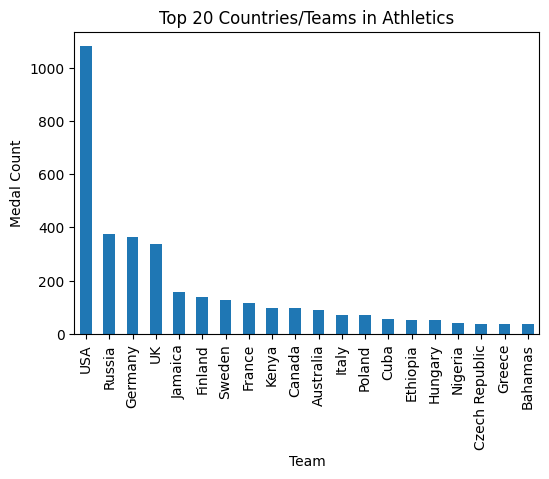

In [1498]:
# Sport with most participants is Athletics
# Let's find the total number of medals won (Must not be equal to "None") by each team in Athletics.

dfAthletics = df_athlete_copy[df_athlete_copy["Sport"] == "Athletics"]
dfAthletics = dfAthletics[dfAthletics["Medal"] != "None"]
nMedalsAthletics = dfAthletics.groupby(['Team'])["Medal"].count()

# We will use nlargest to plot only the top 20 teams as we can't have all of them on a single graph.
# We need only the top couple of teams to answer our question.

nMedalsAthletics = nMedalsAthletics.nlargest(20)


# Plot for Question 1:

fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Top 20 Countries/Teams in Athletics')
axs_2.set_ylabel('Medal Count')
nMedalsAthletics.plot(kind='bar')

Insight: USA has the most medals in the sport with the most participants.

<AxesSubplot:title={'center':'Top 20 Sports In Terms Of Average BMI'}, xlabel='Sport', ylabel='Average BMI'>

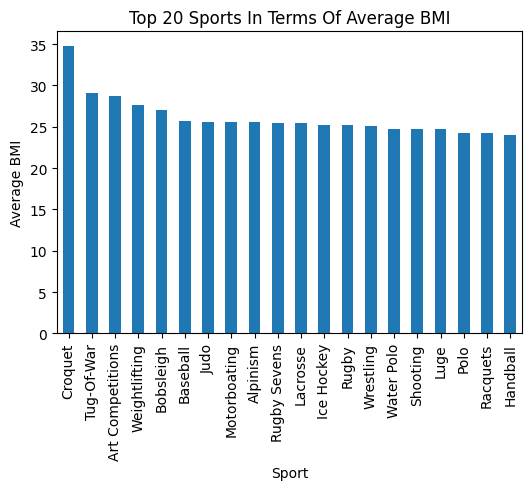

In [1499]:
# Question 2:
# Which sport has the athletes having the highest average BMI (Feature Question)?


AverageBMI = df_merged.groupby(["Sport"])["BMI"].mean()

# We will use nlargest to plot only the top 20 sports as we can't have all of them on a single graph.
# We need only the top couple of sports to answer our question.

AverageBMI = AverageBMI.nlargest(20)

# Plot for Question 2:

fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Top 20 Sports In Terms Of Average BMI')
axs_2.set_ylabel('Average BMI')
AverageBMI.plot(kind='bar')

Insight: Croquet is the sport with athletes having the highest average BMI.

<AxesSubplot:title={'center':'Top 20 Olympians in Athletics'}, xlabel='Name', ylabel='Medal Count'>

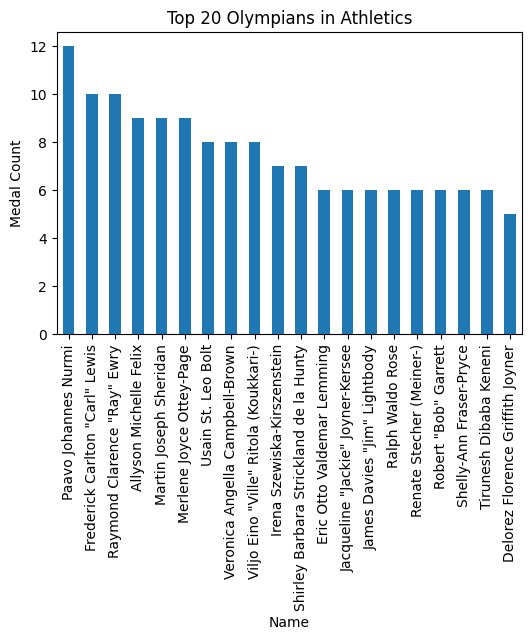

In [1500]:
# Question 3:
# For the sport with the most participants, which olympian has won the most medals?

dfolympian= df_athlete_copy[df_athlete_copy['Sport']=='Athletics']#the sport with the most participants as shown in question 1
dfolympian= (dfolympian[dfolympian['Medal']!='None'])
olympianmedalcount=dfolympian.groupby(['Name'])["Medal"].count()
olympianmedalcount = olympianmedalcount.nlargest(20)

# We will use nlargest to plot only the top 20 olympians as we can't have all of them on a single graph.
# We need only the top couple of olympians to answer our question.

# Plot for Question 3:

fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Top 20 Olympians in Athletics')
axs_2.set_ylabel('Medal Count')
olympianmedalcount.plot(kind='bar')

Insight: Paavo Johannes Nurmi has earned the highest total number of medals in the sport with the most participants.

<AxesSubplot:title={'center':'Top 20 Countries in 2016'}, xlabel='Team', ylabel='Total Medals'>

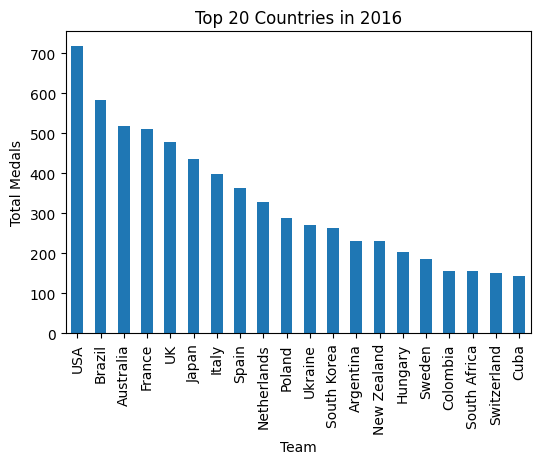

In [1501]:
# Question 4:
# Which country earned the most medals in 2016 (Feature Question)?

MostParticipatedYear = df_merged[df_merged["Year"] == 2016]

countryYearMostMedals = MostParticipatedYear.groupby(["Team"])["Total_Medals_Per_Year"].count()

# We will use nlargest to plot only the top 20 countries as we can't have all of them on a single graph.
# We need only the top couple of countries to answer our question.

countryYearMostMedals = countryYearMostMedals.nlargest(20)

# Plot for Question 4:

fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Top 20 Countries in 2016')
axs_2.set_ylabel('Total Medals')
countryYearMostMedals.plot(kind='bar')

Insight: USA has earned the highest number of medals in 2016.

<AxesSubplot:title={'center':'Top 20 countries in terms of Male participants'}, xlabel='Team', ylabel='Male participants'>

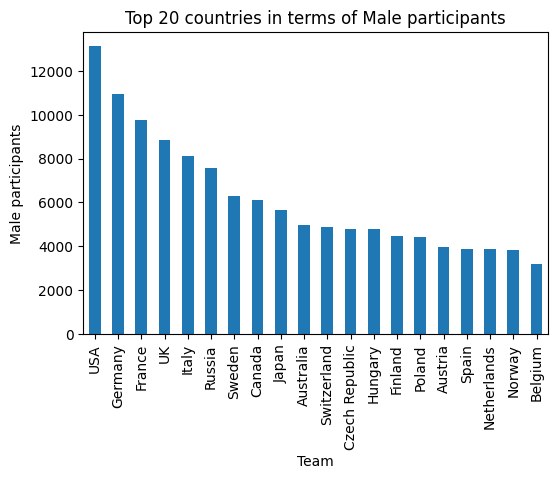

In [1502]:
# Question 5:
# Which country has the highest number of male participants? 

maleMostParticipated =df_athlete_copy[df_athlete_copy["Sex_M"] == 1]
maleMostParticipatedteam=maleMostParticipated.groupby(["Team"])['Sex_M'].count()

# We will use nlargest to plot only the top 20 numbers of male participants as we can't have all of them on a single graph.
# We need only the top couple of numbers of male participants to answer our question.

# Plot for Question 5:

maleMostParticipatedteam=maleMostParticipatedteam.nlargest(20)
fig, axs_2 = plt.subplots(1,1,dpi=100)
axs_2.set_title('Top 20 countries in terms of Male participants')
axs_2.set_ylabel('Male participants')
maleMostParticipatedteam.plot(kind='bar')

Insight: USA has the highest number of male participants.